In [18]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import prince

import gower

%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
loans = pd.read_csv("data/SBA_clnd.csv")
loans.head()

,Name,City,State,Zip,Bank,BankState,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,UrbanRural_cleaned,Disbr_year,Disbr_Month_sin,Disbr_Month_cos,sba_pre_approv,percent_SBA,bank_size,Appv_Month_sin,Appv_Month_cos
0,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006,2,1,0,0,0.0,0.0,253400.0,0,44,1.0,0,13.500000,0.0,2006,0.866025,5.000000e-01,1.0,0.75,1.0,0.5,0.866025
1,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006,7,0,0,0,0.0,0.0,137300.0,0,72,0.0,0,10.500000,0.0,2006,1.000000,6.123234e-17,1.0,0.85,0.0,0.5,0.866025
2,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006,18,1,5,23,1.0,0.0,438541.0,0,61,0.0,0,6.916667,0.0,2006,0.500000,8.660254e-01,1.0,0.50,2.0,0.5,0.866025
3,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,2006,4,0,0,4,1.0,0.0,51440.0,0,23,0.0,1,7.000000,0.0,2006,0.500000,8.660254e-01,1.0,0.50,2.0,0.5,0.866025
4,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,2006,3,0,0,0,0.0,0.0,50000.0,0,53,0.0,1,5.000000,0.0,2006,0.866025,-5.000000e-01,1.0,0.85,0.0,0.5,0.866025


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
bank_counts = loans["Bank"].value_counts()
loans["bank_size"] = loans["Bank"].apply(lambda x: bank_counts[x])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
drop_cols = [
    "Name",
    "City",
    "Zip",
    "Bank",
    "ApprovalFY",
    "Disbr_Month_sin",
    "Disbr_Month_cos",
    "Appv_Month_sin",
    "Appv_Month_cos",
]
loans = loans.drop(columns=drop_cols)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
loans.head()

,State,BankState,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,UrbanRural_cleaned,Disbr_year,sba_pre_approv,percent_SBA,bank_size
0,NC,MN,2,1,0,0,0.0,0.0,253400.0,0,44,1.0,0,13.500000,0.0,2006,1.0,0.75,819
1,AR,MS,7,0,0,0,0.0,0.0,137300.0,0,72,0.0,0,10.500000,0.0,2006,1.0,0.85,2
2,CA,SD,18,1,5,23,1.0,0.0,438541.0,0,61,0.0,0,6.916667,0.0,2006,1.0,0.50,24752
3,FL,FL,4,0,0,4,1.0,0.0,51440.0,0,23,0.0,1,7.000000,0.0,2006,1.0,0.50,4594
4,LA,LA,3,0,0,0,0.0,0.0,50000.0,0,53,0.0,1,5.000000,0.0,2006,1.0,0.85,33


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
num_cols = [
    "NoEmp",
    "CreateJob",
    "RetainedJob",
    "DisbursementGross",
    "Term_years",
    "Disbr_year",
    "percent_SBA",
    "bank_size",
]
cat_cols = [
    "State",
    "BankState",
    "NewExist",
    "RevLineCr",
    "LowDoc",
    "MIS_Status",
    "twoDigNAICS",
    "is_franchise",
    "bank_out_of_state",
    "UrbanRural_cleaned",
    "sba_pre_approv",
]

is_cat = loans.columns.isin(cat_cols)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
sample = loans.sample(1000, random_state=42)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculate Gower Distance Matrix

In [29]:
gower_dist = gower.gower_matrix(sample, cat_features=is_cat)
gower_df = pd.DataFrame(gower_dist, columns=sample.index, index=sample.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
gower_df.describe()

140758       80381        118322       51326        94399   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.318383     0.330911     0.328084     0.347968     0.328952   
std       0.072426     0.100614     0.063923     0.069872     0.102806   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.274727     0.250151     0.287323     0.299139     0.247885   
50%       0.318376     0.324110     0.329121     0.344263     0.323066   
75%       0.361233     0.406570     0.366439     0.395875     0.405037   
max       0.554255     0.617948     0.553250     0.533025     0.618370   

            269131       384790       85378        354892       154137  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.401015     0.345100     0.297355     0.303060     0.311644   
std       0.079623     0.070361     0.090159     0.088308     0.072399   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.352607     0.302743     0.232831     0.240640     0.262421   
50%       0.406339     0.349078     0.297658     0.303017     0.313159   
75%       0.451459     0.392024     0.360260     0.365767     0.362665   
max       0.616178     0.560728     0.556224     0.560586     0.521130   

            362255       34589        111983       33025        196614  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.360967     0.309665     0.333391     0.354015     0.334445   
std       0.069848     0.067523     0.065836     0.068308     0.073031   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.317946     0.266402     0.286799     0.307164     0.286625   
50%       0.356883     0.310250     0.337054     0.350656     0.336466   
75%       0.400975     0.355999     0.382425     0.400759     0.382292   
max       0.589997     0.517318     0.540990     0.526643     0.593607   

            246434       146079       505326       25719        160712  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.369143     0.335514     0.298636     0.302102     0.303869   
std       0.085387     0.097359     0.073027     0.080172     0.086904   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.310904     0.261475     0.252434     0.250429     0.239946   
50%       0.373304     0.327888     0.298190     0.304250     0.296512   
75%       0.433035     0.404300     0.349566     0.353183     0.362775   
max       0.581641     0.618491     0.536988     0.528786     0.567666   

            130991       94993        273310       226747       295686  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.325623     0.311593     0.334832     0.346878     0.371911   
std       0.062867     0.072616     0.076641     0.069787     0.079171   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.282766     0.260455     0.284535     0.302579     0.318733   
50%       0.325925     0.314382     0.337116     0.353737     0.373480   
75%       0.366973     0.364218     0.386200     0.395332     0.433268   
max       0.512410     0.505879     0.527761     0.521928     0.578337   

            98939        334451       6788         123942       168142  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.334749     0.314870     0.297149     0.294959     0.365915   
std       0.056977     0.071021     0.057638     0.085066     0.077672   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.294474     0.270962     0.257922     0.233604     0.311482   
50%       0.336770     0.316241     0.292810     0.289710     0.368740   
75%       0.374410     0.361747     0.334727     0.349608     0.418813   
max       0.483689     0.520550     0.475688     0.551714     0.598832   

          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K-Medoids

In [77]:
k = 4
nrows = gower_df.shape[0]
init_medoids = np.random.randint(0, nrows, k)
init_medoids

array([470, 487, 724, 201])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
kmed = kmedoids(
    gower_dist, initial_index_medoids=init_medoids, data_type="distance_matrix"
)

kmed.process()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
medoid_idxs = kmed.get_medoids()
medoid_idxs

labels = kmed.predict(gower_dist)

sample["label"] = labels

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
sample["label"].value_counts(normalize=True)

3    0.379
2    0.253
0    0.193
1    0.175
Name: label, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
sample.iloc[medoid_idxs, :]

,State,BankState,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,UrbanRural_cleaned,Disbr_year,sba_pre_approv,percent_SBA,bank_size,label
68554,CA,OH,1,0,0,1,1.0,0.0,59096.0,0,23,0.0,0,7.0,0.0,2006,1.0,0.50,20370,0
8492,CA,NC,1,0,0,0,1.0,0.0,10000.0,0,54,0.0,0,7.0,0.0,2004,1.0,0.50,64008,1
122213,NY,VA,2,0,0,2,0.0,0.0,50000.0,0,44,0.0,0,7.0,0.0,2007,1.0,0.50,21344,2
353044,CA,CA,8,0,0,0,0.0,0.0,150000.0,0,42,0.0,1,7.0,0.0,2003,1.0,0.85,393,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
clst_avg = sample.groupby("label").mean().T
clst_avg.style.background_gradient(axis=1)

label,0,1,2,3
NoEmp,7.559585,7.748571,6.948617,12.110818
NewExist,0.082902,0.228571,0.355731,0.393140
CreateJob,1.435233,3.902857,2.098814,4.841689
RetainedJob,6.963731,7.800000,6.181818,5.577836
RevLineCr,1.000000,0.914286,0.007905,0.060686
LowDoc,0.000000,0.000000,0.015810,0.155673
DisbursementGross,120711.626943,66814.537143,190613.470356,302039.263852
MIS_Status,0.202073,0.474286,0.347826,0.102902
twoDigNAICS,45.865285,52.931429,51.735178,52.828496
is_franchise,0.000000,0.022857,0.047431,0.108179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DBSCAN

In [70]:
clst = DBSCAN(eps=0.15, min_samples=5, metric="precomputed")
clst.fit(gower_df)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
sample["label"] = clst.labels_
sample["label"].value_counts()

 0    857
-1    136
 1      4
 2      3
Name: label, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Heir Cluster

FAMD

In [42]:
scaler = StandardScaler()
X_std = scaler.fit_transform(sample[num_cols])
X_std = pd.DataFrame(X_std, columns=num_cols, index=sample[num_cols].index)
# pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols)

scaled_X = pd.concat((X_std, sample[cat_cols]), axis=1)
scaled_X["label"] = labels
scaled_X

,NoEmp,CreateJob,RetainedJob,DisbursementGross,Term_years,Disbr_year,percent_SBA,bank_size,State,BankState,NewExist,RevLineCr,LowDoc,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,UrbanRural_cleaned,sba_pre_approv,label
140758,-0.327880,-0.061422,-0.234662,-0.394090,-0.134712,1.021989,-0.814639,0.234609,AR,VA,0,0.0,0.0,1,56,0.0,0,0.0,1.0,1
80381,-0.282106,-0.107744,-0.181171,-0.395222,-0.900613,0.253576,-0.814639,0.905285,FL,IL,0,1.0,0.0,1,42,0.0,0,0.0,1.0,2
118322,0.724926,0.123864,1.316555,0.126719,-0.134712,0.637783,-0.814639,0.685679,OH,RI,0,0.0,0.0,0,32,0.0,0,1.0,1.0,0
51326,-0.373655,-0.061422,-0.181171,-0.418702,-0.134712,0.253576,-0.814639,0.186682,WI,OH,1,1.0,0.0,0,44,0.0,0,1.0,1.0,0
94399,-0.053235,-0.107744,0.139770,-0.392601,-0.929514,0.253576,-0.814639,0.905285,NY,IL,0,1.0,0.0,1,81,0.0,0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326995,-0.373655,-0.154065,-0.288152,0.068098,2.986695,-1.283249,0.620935,-0.738733,CA,NC,0,0.0,0.0,0,54,0.0,0,0.0,1.0,4
188357,-0.327880,-0.154065,-0.234662,-0.357755,-0.915064,1.021989,-0.814639,2.333929,NY,NC,0,0.0,0.0,1,44,0.0,0,0.0,1.0,2
118646,-0.373655,-0.154065,-0.288152,-0.455982,-0.134712,0.637783,-0.814639,2.333929,NY,NC,1,1.0,0.0,0,23,0.0,0,0.0,1.0,2
324057,-0.144784,-0.154065,-0.020701,0.758958,2.119637,-0.899043,0.620935,0.905285,TX,IL,0,0.0,0.0,0,44,0.0,0,0.0,1.0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
famd = prince.FAMD(n_components=2)
famd.fit(scaled_X)

FAMD(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
     random_state=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

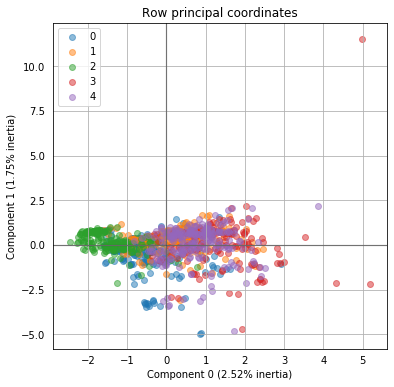

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
famd.plot_row_coordinates(
    scaled_X, color_labels=sample["label"], alpha=0.5, ellipse_fill=False
)
plt.show()

In [ ]:
famd.row_coordinates()